## Neural Network Topology [Feedback]

#### Q1 Write a Python Program to train the following Neural Network with single neuron. Let you start to train the network with w=3, 6 and 9. Update the Weights using back propagation.

In [1]:
import numpy as np

train_inputs = np.array([0,1,2,3,4])
train_outputs = np.array([0,6,12,18,24])

Weight=3
for i in range(5):
    pred_output=train_inputs*Weight
    error=pred_output-train_outputs
    mse=np.square(error).mean()
    
    Weight=Weight+1
    print("--------Output at Iteration----------",i)
    print("Predicted Output: ",pred_output)
    print("Desired Output: ",train_outputs)
    print("Errors",error)
    print("MSE",mse)
    if(mse==0):
        Weight -= 1
        break
        
x = int(input("Enter test case: "))
output = x*Weight
print(output)

--------Output at Iteration---------- 0
Predicted Output:  [ 0  3  6  9 12]
Desired Output:  [ 0  6 12 18 24]
Errors [  0  -3  -6  -9 -12]
MSE 54.0
--------Output at Iteration---------- 1
Predicted Output:  [ 0  4  8 12 16]
Desired Output:  [ 0  6 12 18 24]
Errors [ 0 -2 -4 -6 -8]
MSE 24.0
--------Output at Iteration---------- 2
Predicted Output:  [ 0  5 10 15 20]
Desired Output:  [ 0  6 12 18 24]
Errors [ 0 -1 -2 -3 -4]
MSE 6.0
--------Output at Iteration---------- 3
Predicted Output:  [ 0  6 12 18 24]
Desired Output:  [ 0  6 12 18 24]
Errors [0 0 0 0 0]
MSE 0.0


Enter test case:  12


72


#### Q2 Use Perceptron Rule for Training / Weight Updation during backpropagation

In [2]:
train_inputs = np.array([0,1,2,3])
train_outputs = np.array([0,6,12,18])

Weight=3
lr=0.05
epochs = 1000
for i in range(epochs):
    for k in range(4):
        pred_output[k]=train_inputs[k]*Weight
        error=pred_output[k]-train_outputs[k]
        mse=np.square(error)
        if(int(mse)!=0):
            Weight-=lr*(error)*train_inputs[k]
        if i % 500 == 0 or i == epochs - 1:
            print("--------Output at Iteration----------",i)
            print("Predicted Output: ",pred_output)
            print("Desired Output: ",train_outputs)
            print("Errors",error)
            print("MSE",mse)

print("\n--------Final Output----------")
print("Final Weight: ", Weight)
for k in range(len(train_inputs)):
    pred_output = train_inputs[k] * Weight
    print(f"Input: {train_inputs[k]}, Predicted Output: {pred_output}, Desired Output: {train_outputs[k]}")

--------Output at Iteration---------- 0
Predicted Output:  [ 0  6 12 18 24]
Desired Output:  [ 0  6 12 18]
Errors 0
MSE 0
--------Output at Iteration---------- 0
Predicted Output:  [ 0  3 12 18 24]
Desired Output:  [ 0  6 12 18]
Errors -3
MSE 9
--------Output at Iteration---------- 0
Predicted Output:  [ 0  3  6 18 24]
Desired Output:  [ 0  6 12 18]
Errors -6
MSE 36
--------Output at Iteration---------- 0
Predicted Output:  [ 0  3  6 11 24]
Desired Output:  [ 0  6 12 18]
Errors -7
MSE 49
--------Output at Iteration---------- 500
Predicted Output:  [ 0  6 12 18 24]
Desired Output:  [ 0  6 12 18]
Errors 0
MSE 0
--------Output at Iteration---------- 500
Predicted Output:  [ 0  6 12 18 24]
Desired Output:  [ 0  6 12 18]
Errors 0
MSE 0
--------Output at Iteration---------- 500
Predicted Output:  [ 0  6 12 18 24]
Desired Output:  [ 0  6 12 18]
Errors 0
MSE 0
--------Output at Iteration---------- 500
Predicted Output:  [ 0  6 12 18 24]
Desired Output:  [ 0  6 12 18]
Errors 0
MSE 0
--------Out

#### Q3 Construct a Feedback Neural Network with Single Neuron to train the OR Gate and AND Gate Operations separatetly with initial weight w1=0.6 and w2=0.6 using perceptron training rule 

In [3]:
import numpy as np

# Activation function
def activation(out, threshold):
    return 1 if out >= threshold else 0

# Perceptron training function
def train_perceptron(train_inputs, train_outputs, learning_rate, epochs):
    weights = np.array([0.6, 0.6])
    threshold = 0.5
    for epoch in range(epochs):
        for i in range(len(train_inputs)):
            summation = np.dot(train_inputs[i], weights)
            pred_output = activation(summation, threshold)
            error = train_outputs[i] - pred_output
            if error != 0:
                weights += learning_rate * error * train_inputs[i]
        print(f"Epoch {epoch + 1}/{epochs}")
        print(f"Weights: {weights}")
    return weights

# Training for OR gate
train_inputs_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_outputs_or = np.array([0, 1, 1, 1])
learning_rate = 0.1
epochs = 5

print("Training Perceptron for OR Gate")
weights_or = train_perceptron(train_inputs_or, train_outputs_or, learning_rate, epochs)
print(f"Final Weights for OR Gate: {weights_or}\n")

# Training for AND gate
train_inputs_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_outputs_and = np.array([0, 0, 0, 1])

print("Training Perceptron for AND Gate")
weights_and = train_perceptron(train_inputs_and, train_outputs_and, learning_rate, epochs)
print(f"Final Weights for AND Gate: {weights_and}\n")

# Prediction function
def perceptron_predict(input_data, weights, threshold=0.5):
    summation = np.dot(input_data, weights)
    return activation(summation, threshold)

def test_perceptron(train_inputs, weights, gate_name):
    print(f"Testing Perceptron for {gate_name} Gate")
    for inputs in train_inputs:
        output = perceptron_predict(inputs, weights)
        print(f"Input: {inputs} -> Output: {output}")

test_perceptron(train_inputs_or, weights_or, "OR")
test_perceptron(train_inputs_and, weights_and, "AND")

Training Perceptron for OR Gate
Epoch 1/5
Weights: [0.6 0.6]
Epoch 2/5
Weights: [0.6 0.6]
Epoch 3/5
Weights: [0.6 0.6]
Epoch 4/5
Weights: [0.6 0.6]
Epoch 5/5
Weights: [0.6 0.6]
Final Weights for OR Gate: [0.6 0.6]

Training Perceptron for AND Gate
Epoch 1/5
Weights: [0.5 0.5]
Epoch 2/5
Weights: [0.4 0.4]
Epoch 3/5
Weights: [0.4 0.4]
Epoch 4/5
Weights: [0.4 0.4]
Epoch 5/5
Weights: [0.4 0.4]
Final Weights for AND Gate: [0.4 0.4]

Testing Perceptron for OR Gate
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 1
Input: [1 0] -> Output: 1
Input: [1 1] -> Output: 1
Testing Perceptron for AND Gate
Input: [0 0] -> Output: 0
Input: [0 1] -> Output: 0
Input: [1 0] -> Output: 0
Input: [1 1] -> Output: 1


#### Q4 Implement a common learning algorithm called"Gradient Descent" for linear regression withexample data.Update the parameters of the model such that it fits the data and use a lossfunction to measure how well your model fits the data
#### Step:1
#### Assume X[1,2,3] and y[98,185,275] with w0=1.5 and w1=80 as the initial value of the parameters Calculate the MSE Loss with updated parameters in each iteration.

Epoch 0, MSE: 72469.274
Epoch 500, MSE: 2.03822632437718
Epoch 999, MSE: 0.08686991891396718
Final parameters: w0 = -0.41254354140430277, w1 = 1.1215486936398205


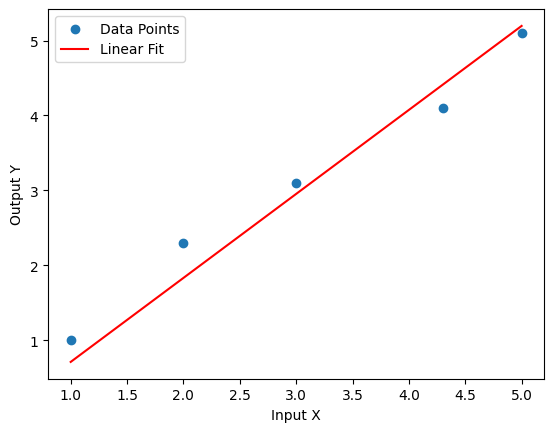

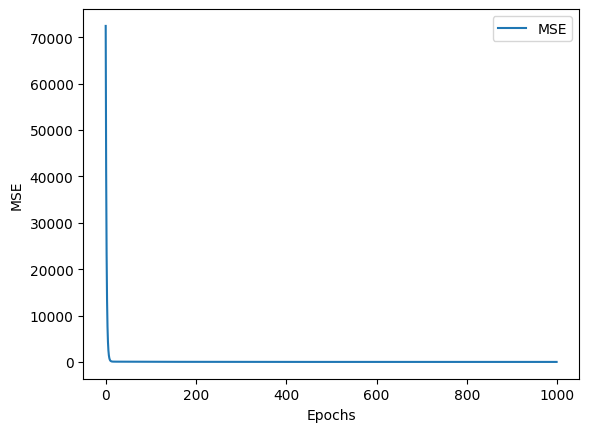

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
x=np.array([1,2,3,4.3,5])
y=np.array([1,2.3,3.1,4.1,5.1])

w0 = 1.5
w1 = 80
epochs = 1000
learning_rate = 0.01

mse_history = []

for i in range(epochs):
    y_pred = w0 + w1 * x
    
    mse = np.mean((y - y_pred) ** 2)
    mse_history.append(mse)

    w0_gradient = -2 * np.mean(y - y_pred)
    w1_gradient = -2 * np.mean((y - y_pred) * x)
    
    w0 -= learning_rate * w0_gradient
    w1 -= learning_rate * w1_gradient

    if i % 500 == 0 or i == epochs - 1:
        print(f"Epoch {i}, MSE: {mse}")

print(f"Final parameters: w0 = {w0}, w1 = {w1}")

# Plotting the results
plt.scatter(x, y, label="Data Points")
plt.plot(x, w0 + w1 * x, color="red", label="Linear Fit")
plt.xlabel("Input X")
plt.ylabel("Output Y")
plt.legend()
plt.show()

# Plotting MSE history
plt.plot(range(epochs), mse_history, label="MSE")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

#### Q5 Construct a feedback neural network using 1 Neuron in the output layer and 3 neurons in the input layer. Use Gradient Descent algorithm/Rule to Update the weights based on the mean of squared error.

In [5]:
import numpy as np

D = np.array([[4, 500, 6],
              [4, 550, 5.5],
              [2, 200, 3.5],
              [2, 250, 4]])

label = np.array([[1], [1], [0], [0]])

np.random.seed(1)
w = np.random.random((3, 1))
learning_rate = 0.01
epochs = 1000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

for iteration in range(epochs):
    # Forward pass
    p = np.dot(D, w) # Perception
    oLayer = sigmoid(p) # Sigmoid activation
    
    mse = np.mean((label - oLayer) ** 2)

    if iteration % 500 == 0 or iteration == epochs - 1:
        print(f"Iteration {iteration}, MSE: {mse}")
    
    error = label - oLayer
    der = sigmoid_derivative(oLayer)
    grad = np.dot(D.T, error * der)
    w += learning_rate * grad

print("\nFinal Weights:")
print(w)
print("\nOutput Layer after Training:")
print(oLayer)

Iteration 0, MSE: 0.5
Iteration 500, MSE: 0.5
Iteration 999, MSE: 0.5

Final Weights:
[[4.17022005e-01]
 [7.20324493e-01]
 [1.14374817e-04]]

Output Layer after Training:
[[1.]
 [1.]
 [1.]
 [1.]]


#### Q6  Construct a feedback neural network using 1 Neuron in the output layer, 3 neurons in the input layer and 4 neuron in the hidden layer. Use Gradient Descent algorithm/Rule to Update the weights based on the mean of squared error.

In [6]:
import numpy as np

D = np.array([[4, 500, 6],
              [4, 550, 5.5],
              [2, 200, 3.5],
              [2, 250, 4]])

label = np.array([[1], [1], [0], [0]])

np.random.seed(1)
w = np.random.random((3, 4))
v = np.random.random((4, 1))
learning_rate = 0.01
epochs = 1000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

for iteration in range(epochs):
    hP = np.dot(D, w) # Perception
    hLayer = sigmoid(hP) # Sigmoid activation
    
    oP = np.dot(hLayer, v) # Perception
    oLayer = sigmoid(oP) # Sigmoid activation
    
    mse = np.mean((label - oLayer) ** 2)
    
    if iteration % 500 == 0 or iteration == epochs - 1:
        print(f"Iteration {iteration}, MSE: {mse}")
    
    oError = label - oLayer
    oDelta = oError * sigmoid_derivative(oLayer)
    
    hError = oDelta.dot(v.T)
    hDelta = hError * sigmoid_derivative(hLayer)

    v += learning_rate * hLayer.T.dot(oDelta)
    w += learning_rate * D.T.dot(hDelta)

print("\nFinal Weights (input to hidden layer):")
print(w)
print("\nFinal Weights (hidden to output layer):")
print(v)
print("\nOutput Layer after Training:")
print(oLayer)

Iteration 0, MSE: 0.3765575721763921
Iteration 500, MSE: 0.25003133159473057
Iteration 999, MSE: 0.2500000013710939

Final Weights (input to hidden layer):
[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385500e-02 1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816733e-01 4.19194514e-01 6.85219500e-01]]

Final Weights (hidden to output layer):
[[-0.24061717]
 [ 0.43304802]
 [-0.41768182]
 [ 0.2253981 ]]

Output Layer after Training:
[[0.50003715]
 [0.50003715]
 [0.50003715]
 [0.50003715]]


#### Q7 Read the content from Insurance_data.csv, build a FBNN to apply a classification of insurance

In [7]:
import numpy as np
import pandas as pd

data = pd.read_csv('insurance_data.csv')

X = data[['age', 'affordability']].values
y = data['have_insurance'].values

X = (X - X.mean(axis=0)) / X.std(axis=0)

np.random.seed(1)
w = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.01
epochs = 1000

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for epoch in range(epochs):
    # Forward pass
    y_pred = sigmoid(np.dot(X, w) + bias)
    
    loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    # Backward pass (Gradient Descent)
    error = y_pred - y
    dw = np.dot(X.T, error) / len(y)
    db = np.mean(error)
    
    w -= learning_rate * dw
    bias -= learning_rate * db
    
    if epoch % 500 == 0 or epoch==epochs-1:
        print(f'Epoch {epoch}, Loss: {loss}')

print("\nFinal weights:", w)
print("Final bias:", bias)

y_pred_class = (y_pred >= 0.5).astype(int)

accuracy = np.mean(y_pred_class == y)
print(f'\nAccuracy: {accuracy}')

Epoch 0, Loss: 0.5765443464665675
Epoch 500, Loss: 0.4912787201527695
Epoch 999, Loss: 0.4788931373447956

Final weights: [1.25681801 0.6275288 ]
Final bias: [0.16097224]

Accuracy: 0.7692307692307693


## Loss and Gradient Descent

#### Q1 Calculate MAE and MSE using Python

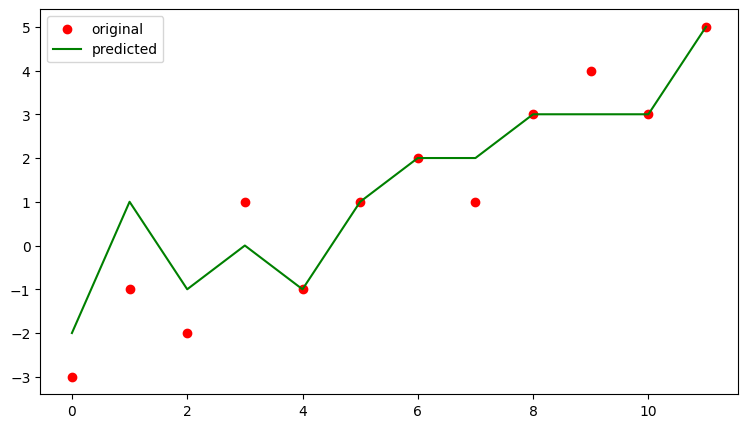

Mean Absolute Error:  0.5833333333333334
Mean Square Error:  0.75


In [8]:
import math 
import numpy as np
import matplotlib.pyplot as plt

y = np.array([-3, -1, -2, 1, -1, 1, 2, 1, 3, 4, 3, 5])
yhat = np.array([-2, 1, -1, 0, -1, 1, 2, 2, 3, 3, 3, 5])
x = list(range(len(y)))

plt.figure(figsize=(9,5))
plt.scatter(x, y, color = "red", label = "original")
plt.plot(x, yhat, color="green", label="predicted")
plt.legend()
plt.show()

d = y - yhat
mae_f = np.mean(abs(d))
mse_f = np.mean(d**2)

print("Mean Absolute Error: ", mae_f)
print("Mean Square Error: ", mse_f)

#### Q2 Write a Python Program to find out the Binary Cross-Entropy

In [9]:
import numpy as np

# Calculate Cross Entropy
def cross_entropy_funct(p, q):
    return -sum([p[i] * np.log(q[i]) for i in range(len(p))])

# Define Classification data p and q
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.7, 0.9, 0.8, 0.8, 0.6, 0.2, 0.1, 0.4, 0.1, 0.3]

# Calculate Cross Entropy For Each Example
results = list()
for i in range(len(p)):
    # Create the distribution for each event {0,1}
    expected = [1.0 - p[i], p[i]]
    predicted = [1.0 - q[i], q[i]]
    # Calculate Cross Entropy for the two events 
    cross = cross_entropy_funct(expected, predicted)
    print('>[y=%.1f, yhat=%.1f] cross entropy: %.3f' % (p[i], q[i], cross))
    results.append(cross)

# Calculate the Average Cross Entropy
mean_cross_entropy = np.mean(results)
print('\nAverage Cross Entropy: %.3f' % mean_cross_entropy)

>[y=1.0, yhat=0.7] cross entropy: 0.357
>[y=1.0, yhat=0.9] cross entropy: 0.105
>[y=1.0, yhat=0.8] cross entropy: 0.223
>[y=1.0, yhat=0.8] cross entropy: 0.223
>[y=1.0, yhat=0.6] cross entropy: 0.511
>[y=0.0, yhat=0.2] cross entropy: 0.223
>[y=0.0, yhat=0.1] cross entropy: 0.105
>[y=0.0, yhat=0.4] cross entropy: 0.511
>[y=0.0, yhat=0.1] cross entropy: 0.105
>[y=0.0, yhat=0.3] cross entropy: 0.357

Average Cross Entropy: 0.272


#### Q3 Implement the Gradient Descent Algorithm for updating of weights and sigmoid function as the activation of the output

In [10]:
import numpy as np

X = [0.5, 2.5]
Y = [0.2, 0.9]

def f(w, b, x):
    return 1.0 / (1.0 + np.exp(-(w * x + b)))

def error(w, b):
    err = 0.0
    for x, y in zip(X, Y):
        fx = f(w, b, x)
        err += 0.5 * (fx - y) ** 2
    return err

def grad_b(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx)

def grad_w(w, b, x, y):
    fx = f(w, b, x)
    return (fx - y) * fx * (1 - fx) * x

def do_gradient_descent():
    w, b, eta = -2, -2, 1.0
    max_epochs = 1000
    for i in range(max_epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w = w - eta * dw
        b = b - eta * db
        
        if i % 100 == 0:  # Print progress every 100 epochs
            print(f"Epoch {i}, w: {w}, b: {b}, error: {error(w, b)}")

    return w, b

final_w, final_b = do_gradient_descent()
print(f"Final weights: w = {final_w}, b = {final_b}")

Epoch 0, w: -1.99450768078436, b: -1.9922888407847856, error: 0.41572985510220245
Epoch 100, w: 1.0178176535179475, b: -1.0756767630747825, error: 0.016913733254885384
Epoch 200, w: 1.6093882322796484, b: -2.0158985309544057, error: 0.0006042390941086365
Epoch 300, w: 1.7333043719547918, b: -2.19855125470132, error: 5.575967872999215e-05
Epoch 400, w: 1.7716827184664272, b: -2.2536739657280194, error: 6.350189866144503e-06
Epoch 500, w: 1.784717647936579, b: -2.2722060802366597, error: 7.717242724659306e-07
Epoch 600, w: 1.7892721293656126, b: -2.2786567379335714, error: 9.587201766370104e-08
Epoch 700, w: 1.7908787284883319, b: -2.2809290885780746, error: 1.2002062151925574e-08
Epoch 800, w: 1.7914473394725916, b: -2.2817329288272514, error: 1.5065915190439192e-09
Epoch 900, w: 1.7916488184247075, b: -2.282017708083497, error: 1.8930024796167204e-10
Final weights: w = 1.7917198301022377, b = -2.2821180729166732
